In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("heart12.csv")

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
from sklearn.metrics import confusion_matrix

In [11]:
from sklearn import metrics

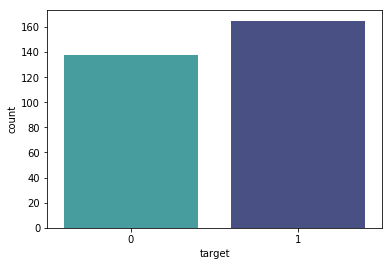

In [12]:
sns.countplot(x="target",data=df,palette="mako_r")

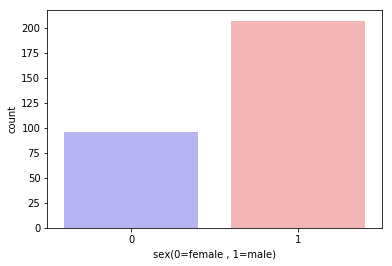

In [13]:
sns.countplot(x="sex",data=df,palette="bwr")
plt.xlabel("sex(0=female , 1=male)")
plt.show()

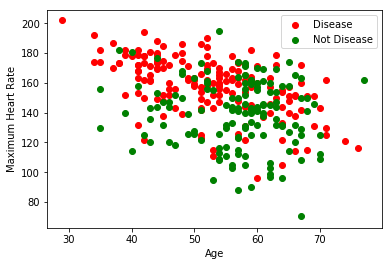

In [14]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="Red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)], c="green")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate") 
plt.show()

In [15]:
X=df.iloc[:,:-1].values
y=df.iloc[:,13].values

In [16]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=0)

In [17]:
scaler=StandardScaler()

In [18]:
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
#sc_X=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [35]:
classifier=KNeighborsClassifier(n_neighbors=5, metric="minkowski" ,p=2)
# prediction
classifier=classifier.fit(X_train,y_train)

In [36]:
y_pred=classifier.predict(X_test)
#test accuracy
accuracy=metrics.accuracy_score(y_test,y_pred)
print('Accuracy:{:.2f}'.format(accuracy))

Accuracy:0.82


In [37]:
classifier=KNeighborsClassifier(n_neighbors=4, metric="minkowski" ,p=2)
classifier=classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
#test accuracy
accuracy=metrics.accuracy_score(y_test,y_pred)
print('Accuracy:{:.2f}'.format(accuracy))

Accuracy:0.84


In [38]:
classifier=KNeighborsClassifier(n_neighbors=6, metric="minkowski" ,p=2)
classifier=classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
#test accuracy
accuracy=metrics.accuracy_score(y_test,y_pred)
print('Accuracy:{:.2f}'.format(accuracy))

Accuracy:0.86


In [39]:
classifier=KNeighborsClassifier(n_neighbors=7, metric="minkowski" ,p=2)
classifier=classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
#test accuracy
accuracy=metrics.accuracy_score(y_test,y_pred)
print('Accuracy:{:.2f}'.format(accuracy))

Accuracy:0.87


In [40]:
classifier=KNeighborsClassifier(n_neighbors=8, metric="minkowski" ,p=2)
classifier=classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
#test accuracy
accuracy=metrics.accuracy_score(y_test,y_pred)
print('Accuracy:{:.2f}'.format(accuracy))

Accuracy:0.87


In [44]:
classifier=classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
accuracy=metrics.accuracy_score(y_test,y_pred)
print('Accuracy:{:.2f}'.format(accuracy))

Accuracy:0.86


In [45]:
classifier=KNeighborsClassifier(n_neighbors=10, metric="minkowski" ,p=2)
classifier=classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
#test accuracy
accuracy=metrics.accuracy_score(y_test,y_pred)
print('Accuracy:{:.2f}'.format(accuracy))

Accuracy:0.86


In [43]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [34]:
cm

array([[25,  8],
       [ 3, 40]], dtype=int64)